Introduction

            This challenge aims to build a predictive model that answers the question: "what kind of people are most likely to survive?" using passenger data 
            (ie name, age, sex, socioeconomic class, etc.).
        
        
Analyze
                    
            To achieve this goal, I observed that the best path would be through some sorting algorithm, since the most important goal is to know the characteristics 
            of those who survived. I was able to observe the existence of missing data and inconsistencies. The "test" file indicates that only women survived, which 
            is not true beyond many instances of "NA". To correct these problems, I adopted the median to fill in the missing data and redid the test base with the 
            "caTools" library. I made two analyzes using decision trees: one without scheduling data and without port of shipment and another with scheduling and port 
            of shipment. However, there was no difference in the results.
            
        
Conclusion


            The algorithm took gender into account as the factor with the greatest determining weight in survival on the Titanic followed by age and No. of siblings 
            / spouses on board the Titanic.
            The predictive model had an Accuracy of 85.17%


   Summary

    1. Capturing the data
        1.1 Understanding the data
        1.2 Checking "NA" data
        
    2. Installing the packages
        2.1 Loading packages
        
    3. Handling the data
        3.1 Shifting survived to last column
        3.2 I will replace the ages and ticket value with the median
        3.3 Transforming the data that I will use to submit to the categorical algorithm a factor
        3.4 Analyzing the test dataframe and gender
        3.5 Checking survivors by sex
        
    4. Algorithm
        4.1 I will use decision tree for analysis with the variable "train"
        4.2 Result of the decision tree
        4.3 Using another visualization model
                
    5. Starting a prediction model
        5.1 Splitting the dataframe into training and testing
        5.2 Making the model
        5.3 Making predictions
        5.4 Preparing the prediction file for submission        
    

In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "titanic"

1. Capturing the data

In [2]:
list.files(path = "../input")

[1] "titanic"

In [3]:
test <- read.csv("../input/titanic/test.csv",stringsAsFactors=F)
train <- read.csv("../input/titanic/train.csv",stringsAsFactors=F)
gender_submission <- read.csv("../input/titanic/gender_submission.csv",stringsAsFactors=F)

    1.1 Understanding the data

In [4]:
summary(test)
summary(train)
summary(gender_submission)
head(test)
head(train)
head(test)

  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

  PassengerId        Survived     
 Min.   : 892.0   Min.   :0.0000  
 1st Qu.: 996.2   1st Qu.:0.0000  
 Median :1100.5   Median :0.0000  
 Mean   :1100.5   Mean   :0.3636  
 3rd Qu.:1204.8   3rd Qu.:1.0000  
 Max.   :1309.0   Max.   :1.0000  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


    1.2 Checking "NA" data

In [5]:
nrow(train)
nrow(test)
head(train)
head(test)
table(is.na(train$Age))
table(is.na(test$Age))

[1] 891

[1] 418

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S



FALSE  TRUE 
  714   177 


FALSE  TRUE 
  332    86 

## The data set has 264 "NA" attributes. The "Age" variable has 177 "NA" in the "Train" dataframe and 86 in the "Test" dataframe. The "Fare" variable has an occurrence in the "Test" dataframe.

2. Installing the packages

In [6]:
install.packages("readr", dependencies=TRUE)
install.packages("dplyr", dependencies=TRUE)
install.packages("party", dependencies=TRUE)
install.packages("rpart", dependencies=TRUE)
install.packages("rpart.plot", dependencies=TRUE)
install.packages("rattle", dependencies=TRUE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘readr’ is not available (for R version 3.6.0)”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘dplyr’ is not available (for R version 3.6.0)”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘party’ is not available (for R version 3.6.0)”
Installing package into ‘/usr/local/lib/R/site-libra

    2.1 Loading packages

In [7]:
library(readr) 
library(dplyr) 
library(party) 
library(rpart) 
library(rpart.plot) 
library(rattle) 

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary


Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



3. Handling the data

    3.1 Shifting survived to last column

In [8]:
train2 <- train[,-2]
train2$Survived <- train$Survived
head(train2)
train <- train2
head(train)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
1,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,1
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,6,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
1,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,1
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,6,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0


    3.2 I will replace the ages and ticket value with the median

In [9]:
train$Age <- ifelse(is.na(train$Age), median(train$Age, na.rm = TRUE), train$Age)
summary(train$Age)
test$Age <- ifelse(is.na(test$Age), median(test$Age, na.rm = TRUE), test$Age)
summary(test$Age)
test$Fare <- ifelse(is.na(test$Fare), median(test$Fare, na.rm = TRUE), test$Fare)
summary(test$Fare)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.42   22.00   28.00   29.36   35.00   80.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.17   23.00   27.00   29.60   35.75   76.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   7.896  14.454  35.577  31.472 512.329 

    3.3 Transforming the data that I will use to submit to the categorical algorithm a factor

In [10]:
test$Sex <- factor(test$Sex)
test$Embarked <- factor(test$Embarked)
train$Sex <- factor(train$Sex)
train$Embarked <- factor(train$Embarked)


    3.4 Analyzing the test dataframe and gender

In [11]:
test_surv <- test
test_surv$Survived <- gender_submission$Survived
summary(test_surv)
test_surv$Survived <- factor(test_surv$Survived, levels = c(0,1))
head(test_surv)


  PassengerId         Pclass          Name               Sex     
 Min.   : 892.0   Min.   :1.000   Length:418         female:152  
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   male  :266  
 Median :1100.5   Median :3.000   Mode  :character               
 Mean   :1100.5   Mean   :2.266                                  
 3rd Qu.:1204.8   3rd Qu.:3.000                                  
 Max.   :1309.0   Max.   :3.000                                  
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :29.60   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max.   :76.00   Max.   :8.0000   Max.   :9.0000                     
      Fare            Cabin           Embarked  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
,<int>,<int>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<fct>,<fct>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,1
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,0
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,0
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,1
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,0


    3.5 Checking survivors by sex

In [12]:
test_surv_male <- subset(test_surv, Sex == "male")
summary(test_surv_male)
test_surv_female <- subset(test_surv, Sex == "female")
summary(test_surv_female)

  PassengerId         Pclass          Name               Sex     
 Min.   : 892.0   Min.   :1.000   Length:266         female:  0  
 1st Qu.: 999.2   1st Qu.:2.000   Class :character   male  :266  
 Median :1103.5   Median :3.000   Mode  :character               
 Mean   :1102.6   Mean   :2.335                                  
 3rd Qu.:1203.8   3rd Qu.:3.000                                  
 Max.   :1309.0   Max.   :3.000                                  
      Age            SibSp            Parch           Ticket         
 Min.   : 0.33   Min.   :0.0000   Min.   :0.0000   Length:266        
 1st Qu.:24.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :29.52   Mean   :0.3797   Mean   :0.2744                     
 3rd Qu.:34.38   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max.   :67.00   Max.   :8.0000   Max.   :9.0000                     
      Fare            Cabin           Embarked S

  PassengerId         Pclass          Name               Sex     
 Min.   : 893.0   Min.   :1.000   Length:152         female:152  
 1st Qu.: 989.5   1st Qu.:1.000   Class :character   male  :  0  
 Median :1093.5   Median :2.000   Mode  :character               
 Mean   :1096.8   Mean   :2.145                                  
 3rd Qu.:1205.2   3rd Qu.:3.000                                  
 Max.   :1306.0   Max.   :3.000                                  
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:152        
 1st Qu.:22.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :29.73   Mean   :0.5658   Mean   :0.5987                     
 3rd Qu.:36.00   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :76.00   Max.   :8.0000   Max.   :9.0000                     
      Fare            Cabin           Embarked S

## Putting together the test and gender data tables, we can see that in the test database only men died in the titanic. This is not true and if this type of sample is submitted to the algorithm, the results will be skewed. To correct this problem I will do a new training and test sample before sending it to analyze the algorithm.

In [13]:
head(train)
train3 <- train[, c(1,4,5,6,7,9,12)]
train3$Survived <- factor(train3$Survived, levels = c(0,1))
head(train3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
,<int>,<int>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<fct>,<int>
1,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,1
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,6,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,,Q,0


,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,1,male,22,1,0,7.2500,0
2,2,female,38,1,0,71.2833,1
3,3,female,26,0,0,7.9250,1
4,4,female,35,1,0,53.1000,1
5,5,male,35,0,0,8.0500,0
6,6,male,28,0,0,8.4583,0


4. Algorithm

    4.1 I will use decision tree for analysis with the variable "train"

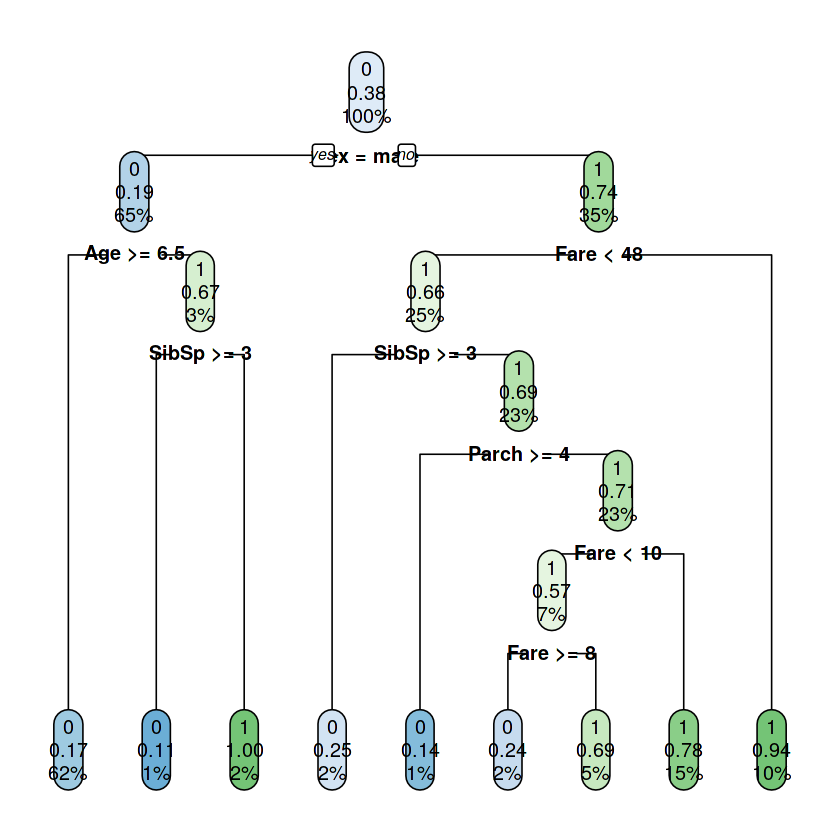

In [14]:
rtree_fit <- rpart(Survived ~ ., train3) 
rpart.plot(rtree_fit)

    4.2 Result of the decision tree

## The algorithm decided that the attributes sex, age and fare are the most important and were decisive.

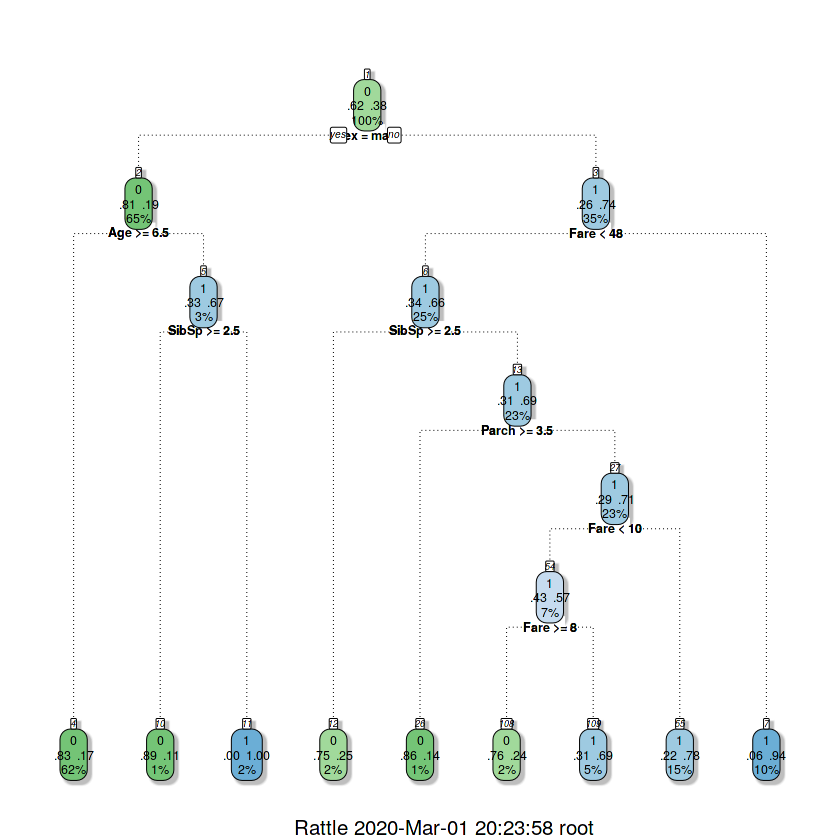

In [15]:
fancyRpartPlot(rtree_fit, cex=0.6)

    4.3 Using another visualization model

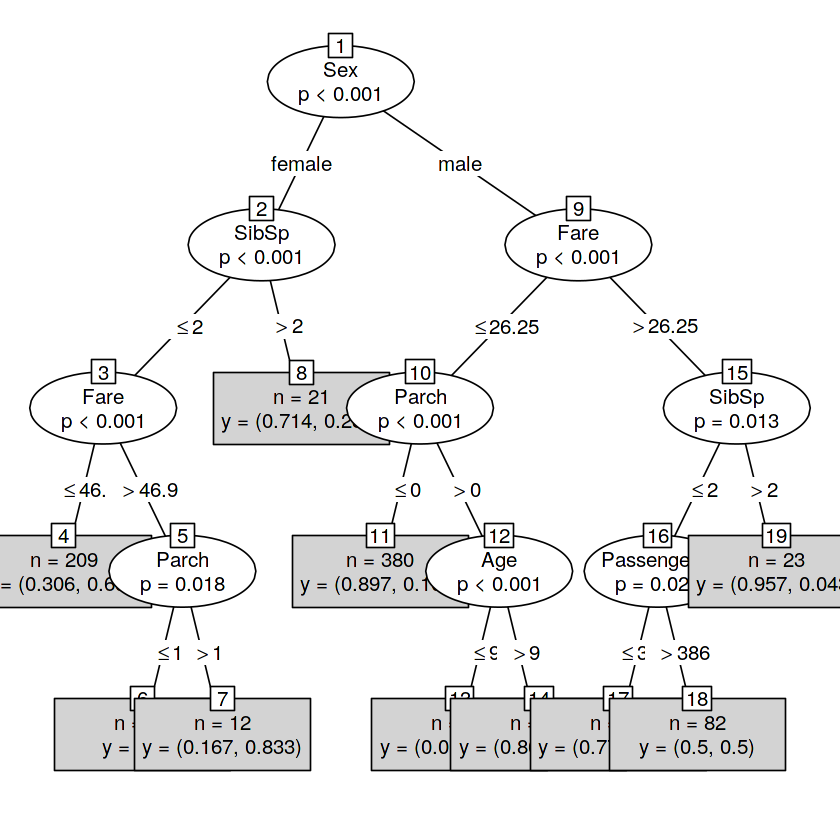

In [16]:
tree_fit <- ctree(Survived ~ ., data = train3)
plot(tree_fit, type="simple")

5. Starting a prediction model

    5.1 Splitting the dataframe into training and testing

## Separating the variables that I will submit to the algorithm

In [17]:
titanic2 <- merge(test_surv[, c (1,4,5,6,7,9,12)], train3, all = TRUE)
head(test_surv)
head(train3)
head(titanic2)
nrow(titanic2)
summary(titanic2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
,<int>,<int>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<fct>,<fct>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,1
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,0
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,0
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,1
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,0


,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,1,male,22,1,0,7.2500,0
2,2,female,38,1,0,71.2833,1
3,3,female,26,0,0,7.9250,1
4,4,female,35,1,0,53.1000,1
5,5,male,35,0,0,8.0500,0
6,6,male,28,0,0,8.4583,0


,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,1,male,22,1,0,7.2500,0
2,2,female,38,1,0,71.2833,1
3,3,female,26,0,0,7.9250,1
4,4,female,35,1,0,53.1000,1
5,5,male,35,0,0,8.0500,0
6,6,male,28,0,0,8.4583,0


[1] 1309

  PassengerId       Sex           Age            SibSp            Parch      
 Min.   :   1   female:466   Min.   : 0.17   Min.   :0.0000   Min.   :0.000  
 1st Qu.: 328   male  :843   1st Qu.:22.00   1st Qu.:0.0000   1st Qu.:0.000  
 Median : 655                Median :28.00   Median :0.0000   Median :0.000  
 Mean   : 655                Mean   :29.44   Mean   :0.4989   Mean   :0.385  
 3rd Qu.: 982                3rd Qu.:35.00   3rd Qu.:1.0000   3rd Qu.:0.000  
 Max.   :1309                Max.   :80.00   Max.   :8.0000   Max.   :9.000  
      Fare         Survived
 Min.   :  0.000   0:815   
 1st Qu.:  7.896   1:494   
 Median : 14.454           
 Mean   : 33.281           
 3rd Qu.: 31.275           
 Max.   :512.329           

## Preparing test with 418 lines according to kaggle challenge

In [18]:
library(caTools)
set.seed(1)
divisao <- sample.split(titanic2$Survived, SplitRatio = 0.681)
treino <- subset(titanic2, divisao == "TRUE")
teste <- subset(titanic2, divisao =="FALSE")
nrow(teste)
head(teste)

[1] 418

,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
3,3,female,26,0,0,7.9250,1
4,4,female,35,1,0,53.1000,1
7,7,male,54,0,0,51.8625,0
10,10,female,14,1,0,30.0708,1
13,13,male,20,0,0,8.0500,0
14,14,male,39,1,5,31.2750,0


    5.2 Making the model

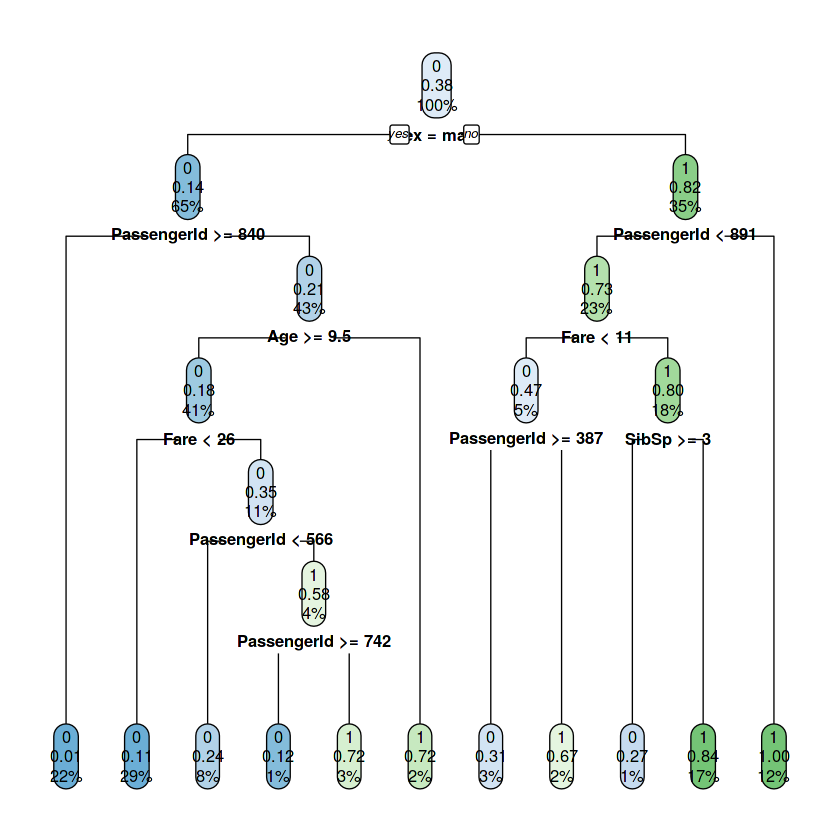

In [19]:
classificador <- rpart(formula = Survived ~., data = treino)
rpart.plot(classificador)


    5.3 Making predictions

In [20]:
previsoes <- predict(classificador, newdata = teste[-7], type = "class")
matriz_conf <- table(teste[,7], previsoes)
library(caret)
confusionMatrix(matriz_conf)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




Confusion Matrix and Statistics

   previsoes
      0   1
  0 229  31
  1  31 127
                                          
               Accuracy : 0.8517          
                 95% CI : (0.8139, 0.8844)
    No Information Rate : 0.622           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6846          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8808          
            Specificity : 0.8038          
         Pos Pred Value : 0.8808          
         Neg Pred Value : 0.8038          
             Prevalence : 0.6220          
         Detection Rate : 0.5478          
   Detection Prevalence : 0.6220          
      Balanced Accuracy : 0.8423          
                                          
       'Positive' Class : 0               
                                          

    5.4 Preparing the prediction file for submission

In [21]:
PassengerId <- test$PassengerId
output.df <- as.data.frame(PassengerId)
Survived1 <- previsoes

output.df$Survived <- Survived1
head(output.df)

write.csv(output.df,"titanic_kaggle_submission.csv",row.names = FALSE)


,PassengerId,Survived
,<int>,<fct>
1,892,1
2,893,1
3,894,0
4,895,1
5,896,0
6,897,0
